# 01. Explore Data

In [1]:
# all imports
import sys
sys.path.insert(0, '../../src/')

import pandas as pd
import os
import matplotlib.pyplot as plt
import transformers
import numpy as np
import seaborn as sns
#gridcv

### Read data

In [2]:
DATA_DIR = '../../data/raw/'
TRAIN_DATASET_PATH = os.path.join(DATA_DIR, 'train.csv')
TEST_DATASET_PATH = os.path.join(DATA_DIR, 'test.csv')

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH, encoding='utf-8')
df_test = pd.read_csv(TEST_DATASET_PATH, encoding='utf-8')

### Explore data

#### Describe data

In [4]:
df_train.head()

,id,y,age,job,marital,education,default,housing,loan,contact,...,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,36,blue-collar,married,basic.9y,unknown,no,no,telephone,...,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
1,1,0,34,technician,married,professional.course,no,yes,no,cellular,...,4,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
2,2,0,28,student,single,university.degree,unknown,yes,no,cellular,...,4,2,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
3,3,0,36,technician,single,high.school,no,yes,no,cellular,...,4,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1
4,4,0,53,blue-collar,married,unknown,unknown,yes,no,cellular,...,5,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36245 entries, 0 to 36244
Data columns (total 21 columns):
id                36245 non-null int64
y                 36245 non-null int64
age               36245 non-null int64
job               36245 non-null object
marital           36245 non-null object
education         36245 non-null object
default           36245 non-null object
housing           36245 non-null object
loan              36245 non-null object
contact           36245 non-null object
month             36245 non-null int64
day_of_week       36245 non-null int64
campaign          36245 non-null int64
pdays             36245 non-null int64
previous          36245 non-null int64
poutcome          36245 non-null object
emp.var.rate      36245 non-null float64
cons.price.idx    36245 non-null float64
cons.conf.idx     36245 non-null float64
euribor3m         36245 non-null float64
nr.employed       36245 non-null float64
dtypes: float64(5), int64(8), object(8)
memory usage: 

In [6]:
NUMERIC_VARIABLES = [
    'age',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

CATEGORICAL_VARIABLES = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'poutcome',
    'month',
    'day_of_week',
]


TRAINING_VARIABLES = NUMERIC_VARIABLES + CATEGORICAL_VARIABLES
ALL_VARIABLES = TRAINING_VARIABLES + ['id', 'y']

#### Count unique values

In [7]:
for variable in CATEGORICAL_VARIABLES:
    print(variable+" has "+str(len(df_train[variable].unique()))+ " unique values")

job has 12 unique values
marital has 4 unique values
education has 8 unique values
default has 3 unique values
housing has 3 unique values
loan has 3 unique values
contact has 2 unique values
poutcome has 3 unique values
month has 10 unique values
day_of_week has 5 unique values


In [8]:
for variable in NUMERIC_VARIABLES:
    print(variable+" has "+str(len(df_train[variable].unique()))+ " unique values")

age has 77 unique values
campaign has 40 unique values
pdays has 25 unique values
previous has 8 unique values
emp.var.rate has 10 unique values
cons.price.idx has 26 unique values
cons.conf.idx has 26 unique values
euribor3m has 314 unique values
nr.employed has 11 unique values


#### Check missing data

In [9]:
for variable in TRAINING_VARIABLES:
    missing = sum(df_train[variable].isnull())*(1./df_train.shape[0])
    if missing > 0:
        print('% Missing - ' + variable + ': ' + str(missing))

#### Plot numeric features

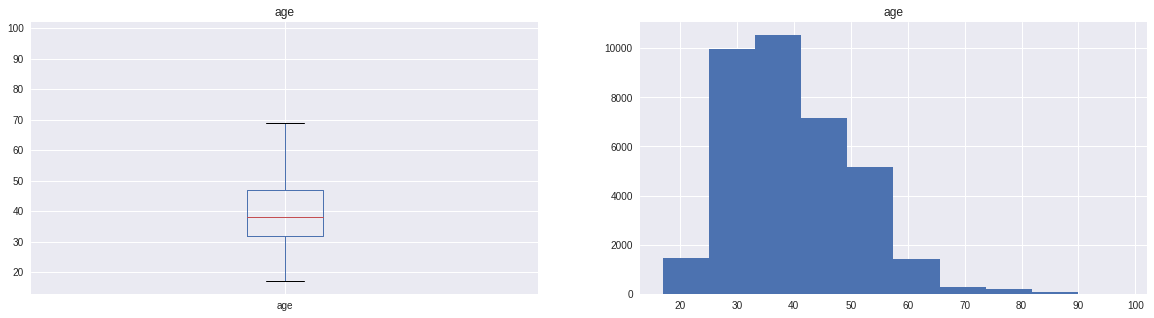

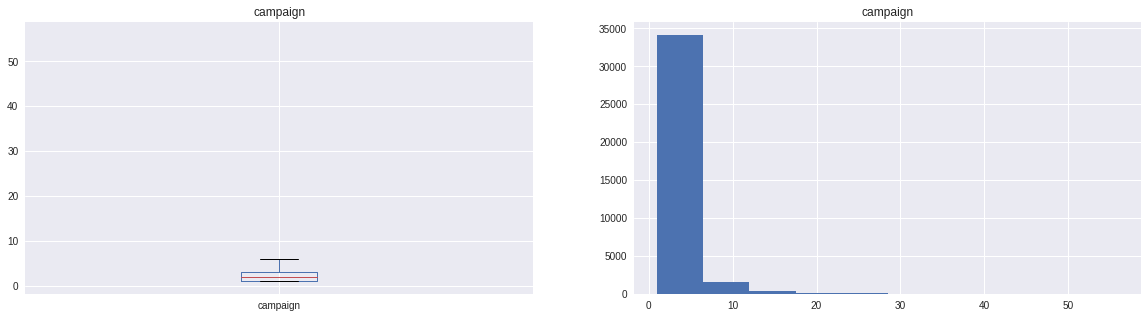

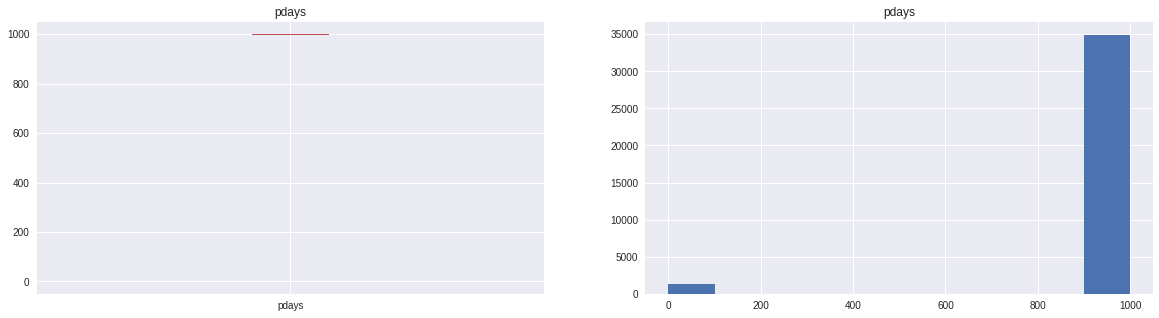

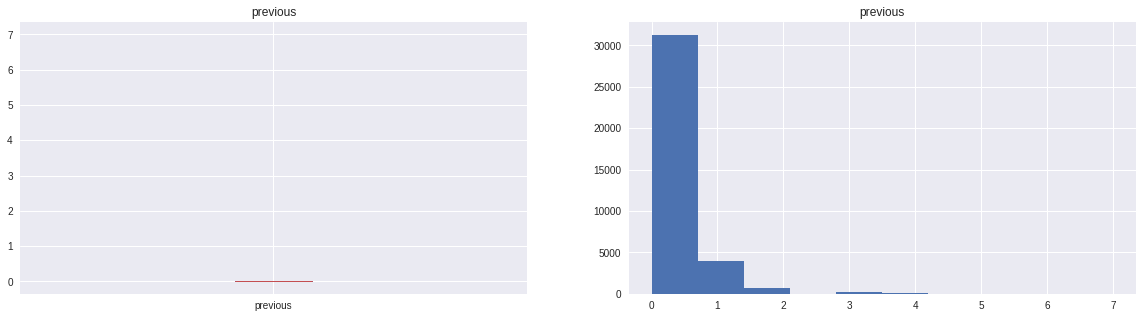

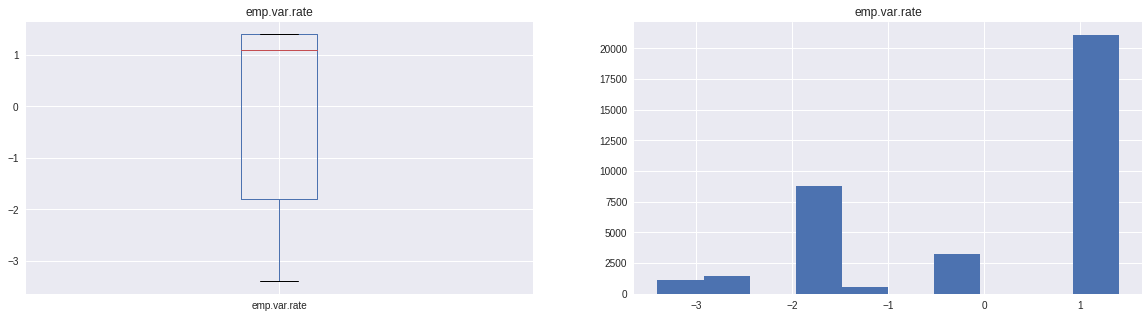

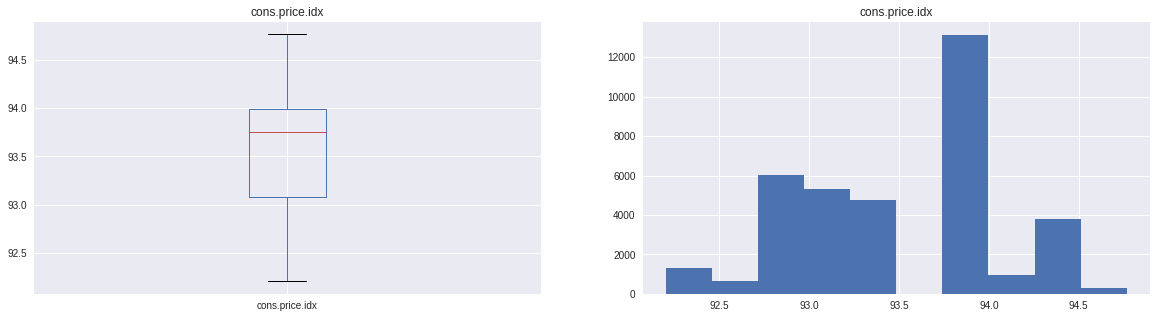

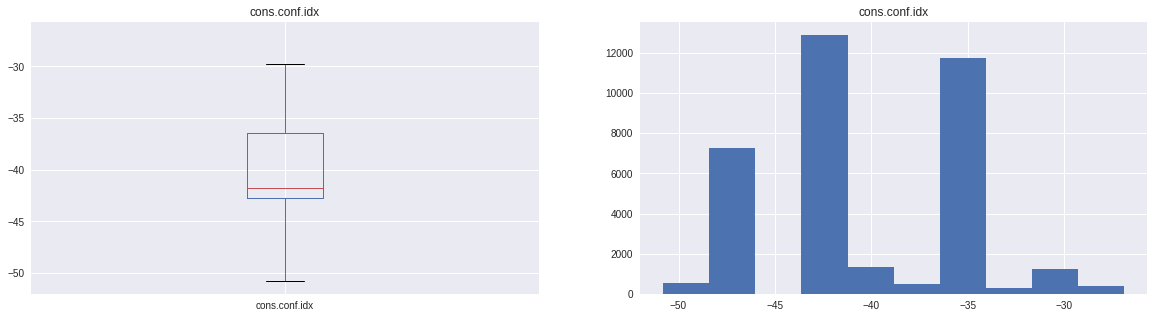

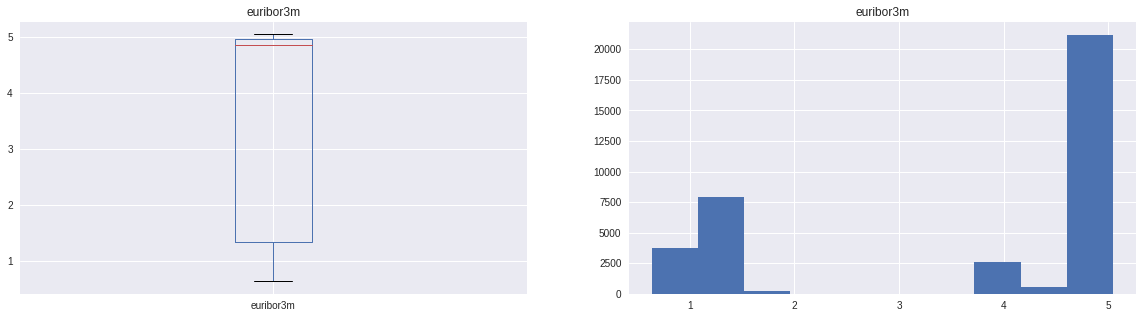

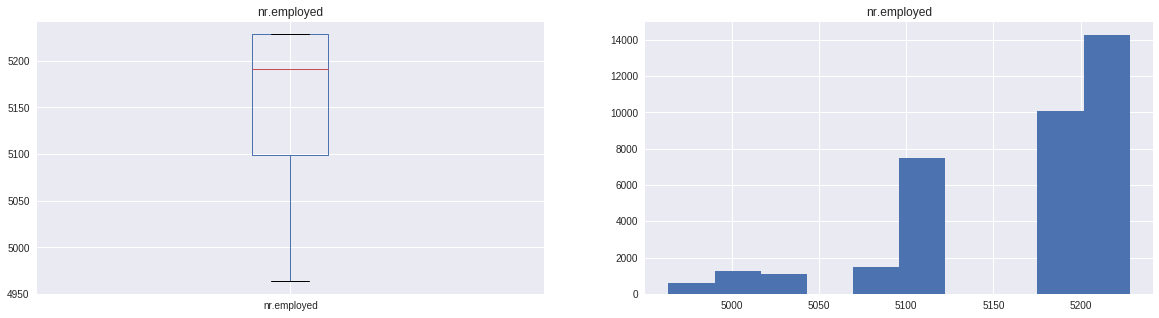

In [10]:
for variable in NUMERIC_VARIABLES:
    plt.figure(figsize=[20,5])
    ## Boxplots
    plt.subplot(1,2,1)
    df_train[[variable]].boxplot()
    plt.title(variable)
    ## Histogramas
    plt.subplot(1,2,2)
    df_train[variable].hist()
    plt.title(variable)
    plt.show()

#### Plot categorical features

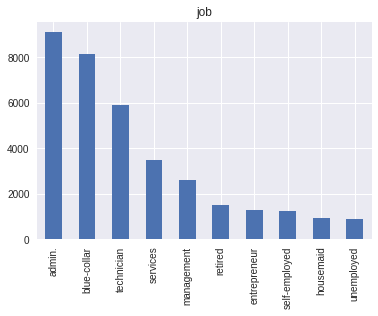

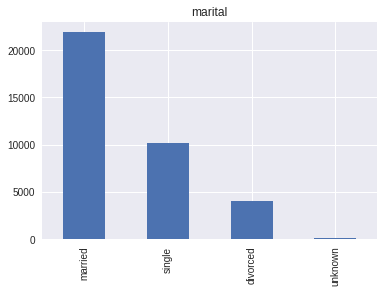

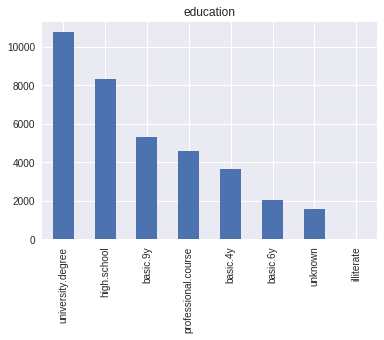

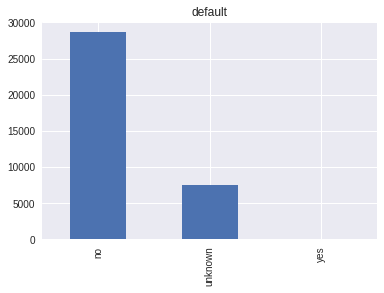

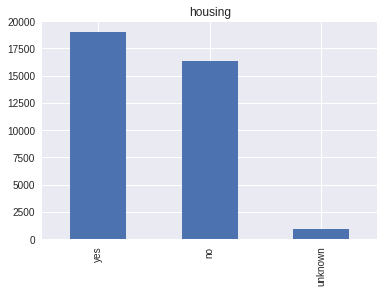

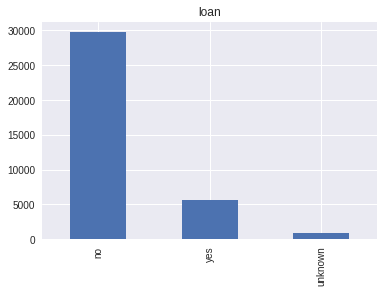

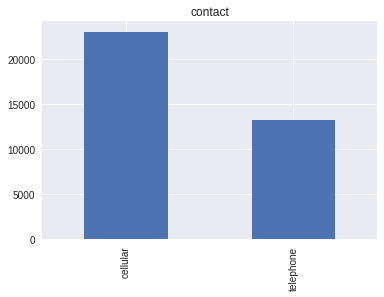

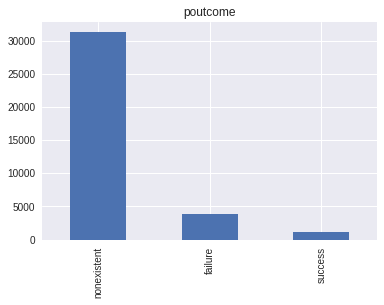

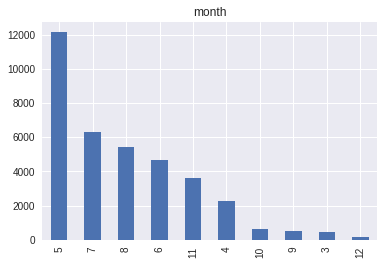

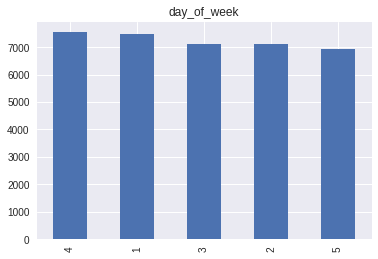

In [11]:
skip_vars = []

for variable in CATEGORICAL_VARIABLES:
    if variable in skip_vars:
        continue
    else:
        df_train[variable].value_counts().head(10).plot(kind='bar', title=variable)
        plt.show()

#### Describe target

In [12]:
observations = df_train.shape[0]
yes_observations = df_train[df_train['y'] == 1].shape[0]
no_observations = df_train[df_train['y'] == 0].shape[0]

print('Total observations: '+str(observations))
print('YES observations: '+str(yes_observations))
print('NO observations: '+str(no_observations))

Total observations: 36245
YES observations: 4073
NO observations: 32172


#### Check skewness

In [13]:
skewness = df_train[NUMERIC_VARIABLES].skew()
NORMAL_NUMERIC_VARIABLES =  skewness[(skewness > -1.0) & (skewness < 1.0)].sort_values().index.values
SKEWED_NUMERIC_VARIABLES = [x for x in NUMERIC_VARIABLES if x not in NORMAL_NUMERIC_VARIABLES]

In [14]:
SKEWED_NUMERIC_VARIABLES

['campaign', 'pdays', 'previous', 'nr.employed']

In [15]:
NORMAL_NUMERIC_VARIABLES

array(['emp.var.rate', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'age'], dtype=object)

#### Plot skewed features

Feature: campaign
Feature skewness: 4.714030874472437
Feature skewness cube root: 2.021684288422354
Feature skewness sqrt: 2.490770492588431
Feature skewness reciprocal: 0.36992121584435084
Feature skewness log: 1.3431285427836137


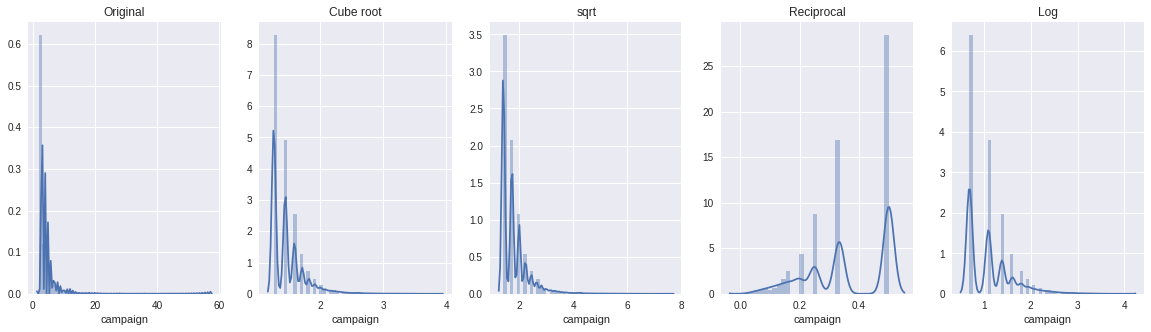

Feature: pdays
Feature skewness: 4.910218829956135
Feature skewness cube root: 4.922725386482266
Feature skewness sqrt: -4.914414065230177
Feature skewness reciprocal: 9.791022697598418
Feature skewness log: 4.994254667546791


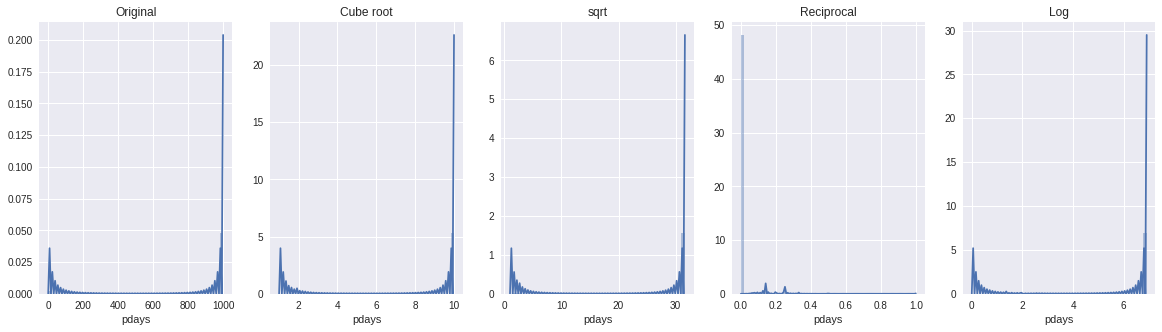

Feature: previous
Feature skewness: 3.9200090709921143
Feature skewness cube root: 2.8704006792795265
Feature skewness sqrt: 3.0570971880027398
Feature skewness reciprocal: 2.2379474715165193
Feature skewness log: 2.598780130955968


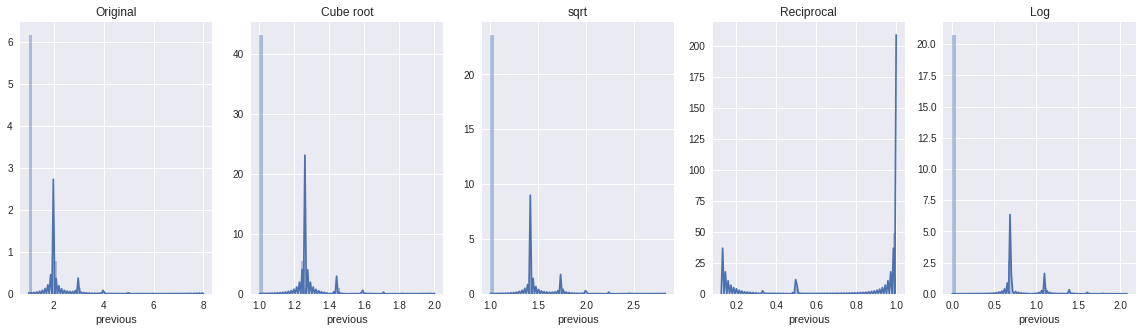

Feature: nr.employed
Feature skewness: 1.042039186296287
Feature skewness cube root: 1.054934196310106
Feature skewness sqrt: -1.051694700748169
Feature skewness reciprocal: 1.081231359042586
Feature skewness log: 1.061444815937152


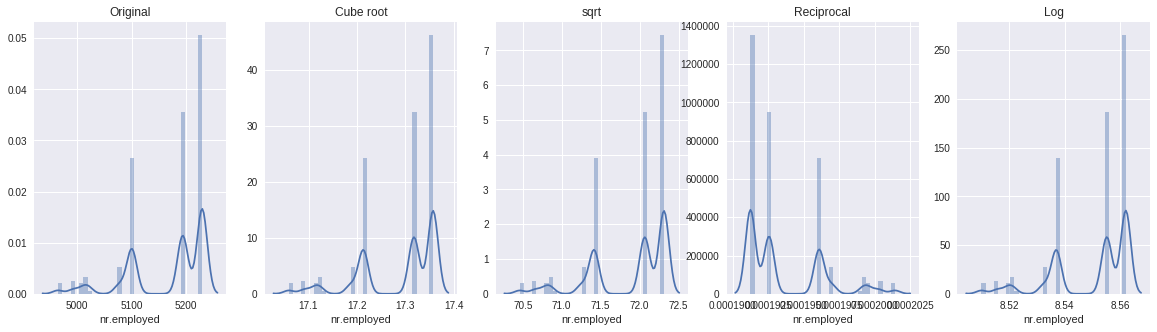

In [16]:
for feature in SKEWED_NUMERIC_VARIABLES:
    df_skewed = df_train[df_train[feature].notnull()]
    df_skewed[feature] = df_skewed[feature] + 1
    only_positive = min(df_skewed[feature]) > 0
    feature_log = transformers.apply_log(df_skewed[feature])
    feature_cube = transformers.apply_cube_root(df_skewed[feature])
    feature_reciprocal = 1 / df_skewed[feature]
    feature_sqrt = np.sqrt(df_skewed[feature])
    
    feature_skew = abs(df_skewed[feature].skew())
    feature_log_skew = abs(feature_log.skew())
    feature_cube_skew = abs(feature_cube.skew())
    feature_reciprocal_skew = abs(feature_reciprocal.skew())
    
    print('Feature: ' + feature)
    print('Feature skewness: ' + str(feature_skew))
    print('Feature skewness cube root: ' + str(feature_cube_skew))
    print('Feature skewness sqrt: ' + str(feature_sqrt.skew()))
    print('Feature skewness reciprocal: ' + str(feature_reciprocal_skew))
    print('Feature skewness log: ' + str(feature_log_skew))

    plt.figure(figsize=[20,5])
    ## Histograms
    plt.subplot(1,5,1)
    sns.distplot(df_skewed[feature])
    plt.title('Original')
    ## Histograms
    plt.subplot(1,5,2)
    sns.distplot(feature_cube)
    plt.title('Cube root')
    ## Histograms
    plt.subplot(1,5,3)
    sns.distplot(feature_sqrt)
    plt.title('sqrt')
    if (only_positive):
        ## Histograms
        plt.subplot(1,5,4)
        sns.distplot(feature_reciprocal)
        plt.title('Reciprocal')
        ## Histograms
        plt.subplot(1,5,5)
        sns.distplot(feature_log)
        plt.title('Log')
    plt.show()
    

#### Numeric feature vs target

age


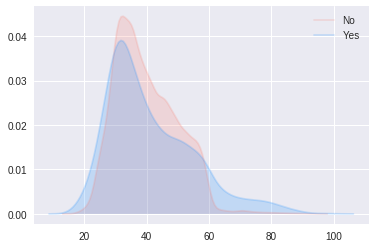

campaign


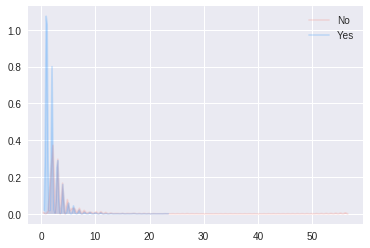

pdays


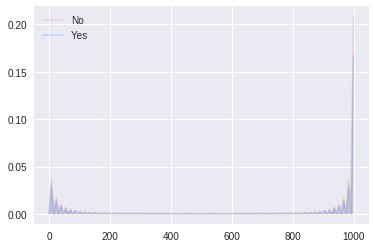

previous


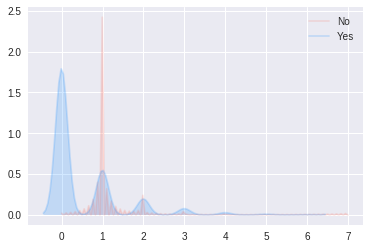

emp.var.rate


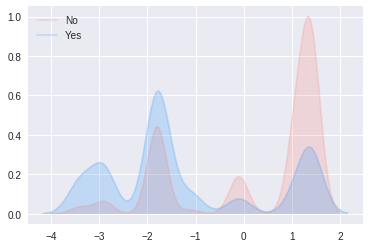

cons.price.idx


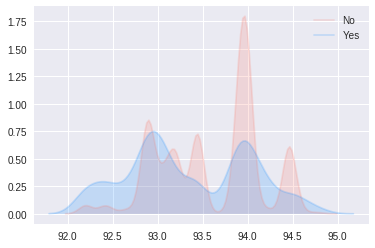

cons.conf.idx


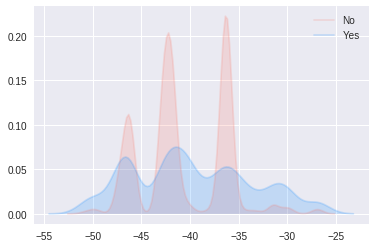

euribor3m


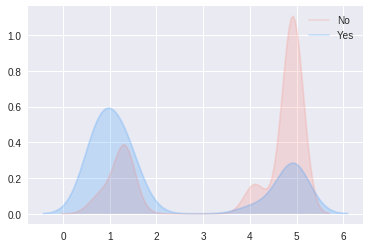

nr.employed


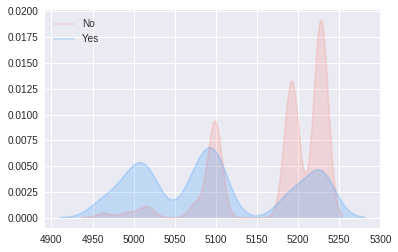

In [17]:
for variable in NUMERIC_VARIABLES:
    print(variable)
    sns.kdeplot(df_train.query("y == 0")[variable], shade=True, alpha=.2, label='No', color='salmon')
    sns.kdeplot(df_train.query("y == 1")[variable], shade=True, alpha=.2, label='Yes',color='dodgerblue')
    plt.show()

#### Check multicolinearity

In [18]:
df_corr = df_train[NUMERIC_VARIABLES].corr()

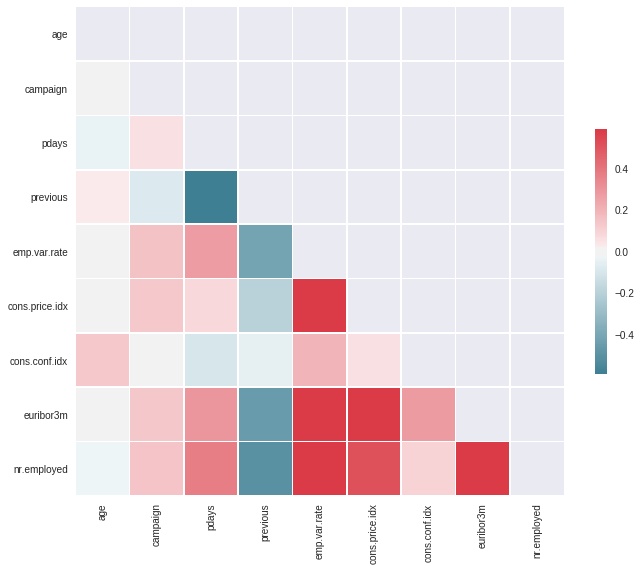

In [19]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)